### <p style="text-align: right;"> Lucas Jose Chaves Hossi

# <p style="text-align: center;">Gravity & Orbital Dynamics

<font color="red">   </font>
Gravitation is the mutual attraction of all masses in the universe. Since its effect decreases in proportion to distance squared, it never quite disappears completely. Because of this, it applies, to some extent, regardless of the sizes of the masses or their distance apart.

Newton's first law describes how, once in motion, planets remain in motion. What it does not do is explain how the planets are observed to move in nearly circular orbits rather than straight lines. Enter the second law. To move in a curved path, a planet must have an acceleration toward the center of the circle. This is called centripetal acceleration and is supplied by the mutual gravitational attraction between the sun and the planet.


Kepler's Laws
- Johannes Kepler's laws of planetary motion are:
    - The orbit of every planet is an ellipse with the Sun at one of the two foci.
    - A line joining a planet and the Sun sweeps out equal areas during equal intervals of time.
    - The square of the orbital period of a planet is directly proportional to the cube of the semi-major axis of its orbit.



Gravity as we know, is the force attraction between two or more. the Gravitational force is proportional to the distance squared between the object and is the force responsible of keeping all the planns in orbit to the sun.

Gravity's range is infinite but its effects are weaker on distant objects  

Gravity is the weakest of the four fundamental forces of physics, approximately 10^38 times weaker than the strong force, 10^36 times weaker than the electromagnetic force and 10^29 times weaker than the weak force. As a consequence, it has no significant influence at the level of subatomic particles. In contrast, it is the dominant force at the macroscopic scale, and is the cause of the formation, shape and trajectory (orbit) of astronomical bodies.

In [1]:
from Class_implementation_2D import *
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline


In [2]:
# Initial conditions,

x_initial=100                 #  m
y_initial=-50                 #  m
vx_initial=1.2                #  m/s
vy_initial=1                  #  m/s
N_iter=100
time_step=5
m=0.9                 #  Kg
M=300                 #  Kg
    

G=1                # Gravitational constant m^3/(Kg*s^2)
μ=G*(M+m)


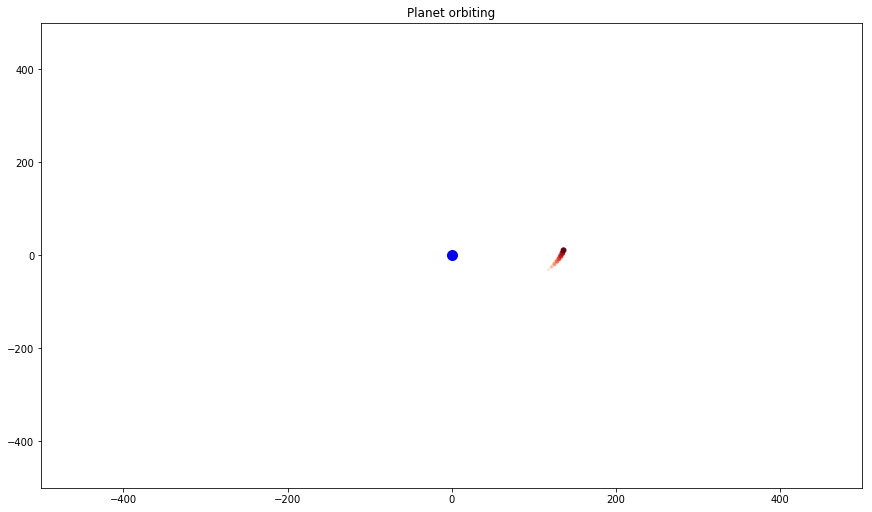

In [3]:
p1=planet(x0=x_initial, y0=y_initial, v0x=vx_initial, v0y=vy_initial, m=m, M=M, G=G, n_iter=N_iter, tstep=time_step)
values=p1.orbit()

In [4]:
#Creating a dataframe for our data

Data= {'X_pos': np.array(values[0][0:N_iter]), 'Y_pos': np.array(values[1][0:N_iter]), 'Theta': np.array(values[2][0:N_iter]),
       'r': np.sqrt((np.array(values[0][0:N_iter])**2+np.array(values[1][0:N_iter])**2))}
Formated_data = pd.DataFrame(data=Data)
Formated_data.head()                                        # taking a peek at the first entries of the dataset

,Theta,X_pos,Y_pos,r
0,-0.463648,100.000000,-50.000000,111.803399
1,-0.401178,105.517009,-44.758505,114.617464
2,-0.341662,110.561005,-39.316365,117.343565
3,-0.284807,115.143122,-33.709978,119.976252
4,-0.230352,119.275193,-27.971832,122.511204


In [5]:
x_pos=Data['X_pos']
y_pos=Data['Y_pos']
theta=Data['Theta']
r=Data['r']

Text(0,0.5,'y_pos')

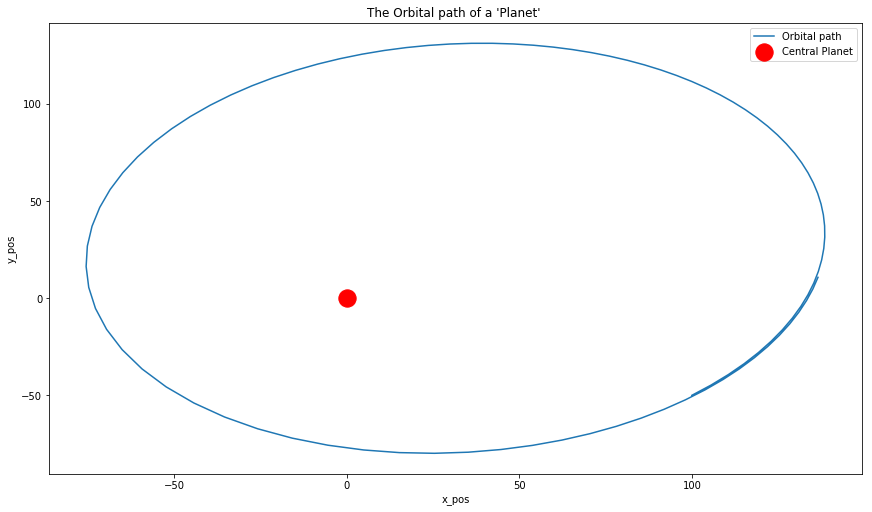

In [6]:
# Plotting the full path of the orbiting "planet" 

fig = plt.figure(figsize = (12,7),constrained_layout=True)
plt.plot(x_pos,y_pos, label="Orbital path")
plt.scatter(x=0,y=0,c="r", s=300, label="Central Planet")

plt.title("The Orbital path of a 'Planet' ")
plt.legend(loc="upper right")
plt.xlabel("x_pos")
plt.ylabel("y_pos")

#### Calculating the foci (focus) of the ellipse



Foci (focus points) of an ellipse 
Two points inside an ellipse that are used in its formal definition. See Ellipse definition. 
Try this Drag any orange dot. As you reshape the ellipse, note how the two focus points (F1 and F2) move. 
 
An ellipse has two focus points. The word foci (pronounced 'foe-sigh') is the plural of 'focus'. One focus, two foci. 
The foci always lie on the major (longest) axis, spaced equally each side of the center. If the major axis and minor axis are the same length, the figure is a circle and both foci are at the center.

https://math.stackexchange.com/questions/2131249/distance-between-two-foci-astronomy
http://www.calctool.org/CALC/phys/astronomy/planet_orbit

In [7]:
#Calculating the foci (focus) of the ellipse

width_of_ellipse=r.max()+r.min()                                    #calculating the full width of the the ellipse
foci=(width_of_ellipse/2)-r.min()                                  #since we know one of the foci is at origin (0,0), then:

print("The full width of the the ellipse is equal to {:>5.2f} \n".format(width_of_ellipse))  
print("The foci is {:>5.2f} meters from the center".format(foci))

The full width of the the ellipse is equal to 220.28 

The foci is 40.73 meters from the center


In [8]:
#Finding the semi_major_axis and eccentricity of the elliptical orbit from the data collected 

if max(abs(x_pos)) > max(abs(y_pos)):
    R=min(x_pos)
    semi_major_axis=max(abs(x_pos))-abs(R)
    eccentricity=foci/semi_major_axis
    
else:
    R=min(x_pos)
    semi_major_axis=max(abs(y_pos))-abs(R)
    eccentricity=foci/semi_major_axis
    

print("\nThe eccentricity of the ellipse is equal to ", eccentricity)
print("\nThe semi_major_axis is equal to ", semi_major_axis, " meters")


The eccentricity of the ellipse is equal to  0.6462384197264968

The semi_major_axis is equal to  63.01889965522203  meters


### Orbital Period

In [9]:
# The calculating the orbital period:

T=2*np.pi*np.sqrt(semi_major_axis**3/μ)
print("The orbital period for this elliptic path is equal to {:>5.2f} s^2 \n".format(T))

The orbital period for this elliptic path is equal to 181.21 s^2 



### Total Energy
So the total energy is always negative. In the same way that electrons in an atom are bound to their nucleus, we can say that a planet is bound to the sun. It's energy is negative so it doesn't have enough energy to escape to infinity. 

But what if the energy were positive? In that case the trajectories are no longer elliptical, and instead you get hyperbolic orbits! The object comes in from inter-stellar space (as they say on star trek) almost going in a straight line, and then cruises around the sun and is finally deflected in a straight line off into never-never land, never to be seen by us again! 


Considering 2D motion:
- If the total energy is positive, the particle's trajectory is a hyperbola.
- If the total energy is zero, the particle's trajectory is a parabola.
- If the total energy is negative, the particle's trajectory is an ellipse.

In [10]:
# The velocity is given by,  (m/s)
v=np.sqrt(μ/semi_major_axis)
print("The orbiting planet as a velocity of {:>5.2f} m/s \n".format(v))

# The Total Energy is given by,
E=(-G*M*m)/(2*semi_major_axis)
print("The total Energy of the orbiting planet is: \n {}".format(E))

The orbiting planet as a velocity of  2.19 m/s 

The total Energy of the orbiting planet is: 
 -2.1422144902336977


## Trying Scattering

In [11]:
# Initial conditions, scater at 2

x_initial=50
y_initial=-50
vx_initial=1.2
vy_initial=1
N_iter=50
time_step=5
m=5.9722*10**(24)                #  Kg
M=5.9722*10**(24)                 #  Kg
    

G=1                  # Gravitational constant m^3/(Kg*s^2)
μ=G*M

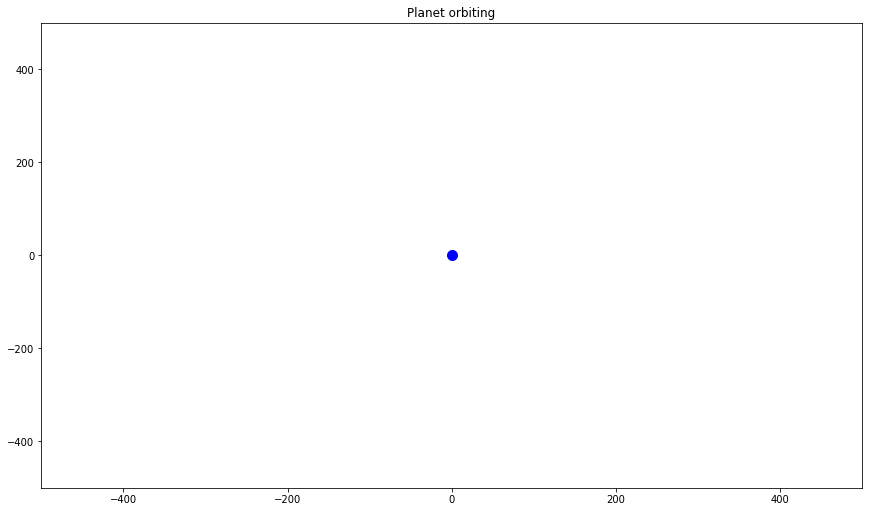

In [12]:
p2=planet(x0=x_initial, y0=y_initial, v0x=vx_initial, v0y=vy_initial, m=m, M=M, G=G, n_iter=N_iter, tstep=time_step)
values=p2.orbit()

In [14]:
Data= {'X_pos': values[0][0:N_iter], 'Y_pos': values[1][0:N_iter], 'Theta': values[2][0:N_iter]}
Formated_data = pd.DataFrame(data=Data)
Formated_data.head()

,Theta,X_pos,Y_pos
0,-0.785398,5.000000e+01,-5.000000e+01
1,2.356194,-1.261025e+47,1.261025e+47
2,2.356194,-2.522050e+47,2.522050e+47
3,2.356194,-3.783075e+47,3.783075e+47
4,2.356194,-5.044100e+47,5.044100e+47


In [15]:
x_pos=np.array(values[0][0:N_iter])
y_pos=np.array(values[1][0:N_iter])
theta=np.array(values[2][0:N_iter])

In [16]:
foci=np.sqrt(max(abs(x_pos))**2-max(abs(y_pos))**2)
foci

0.0

In [17]:
if max(abs(x_pos)) > max(abs(y_pos)):
    semi_major_axis=max(abs(x_pos))
    eccentricity=foci/semi_major_axis
    
else:
    semi_major_axis=max(abs(y_pos))
    eccentricity=foci/semi_major_axis
    

print("\nThe eccentricity of the ellipse is equal to ", eccentricity)
print("\nThe semi_major_axis is equal to ", semi_major_axis)


The eccentricity of the ellipse is equal to  0.0

The semi_major_axis is equal to  6.179022446324575e+48


In [18]:
# The orbital period is given by:

T=2*np.pi*np.sqrt(semi_major_axis**3/μ)
T

3.949047486499927e+61

In [19]:
# The Energy in terms of the semi_major_axis is given by,

E=(-G*M*m)/(2*semi_major_axis)
E

-2.886150127292033

In [20]:
v=np.sqrt(μ/semi_major_axis)
v

9.831217066951354e-13

### TRYING

In [21]:
# Initial conditions

x_initial=3.7*10**(8)
y_initial=1*10**(8)
vx_initial=0.3*10**(3)
vy_initial=0.95*10**(3)
N_iter=10
time_step=20
m=5.9722*10**(24)                 #  Kg
M=1.024*10**(26)                 #  Kg
    

G=6.674*10**(-11)                  # m^3/(Kg*s^2)
μ=G*M

In [22]:
p1=planet(x0=x_initial, y0=y_initial, v0x=vx_initial, v0y=vy_initial, m=m, M=M, n_iter=N_iter, tstep=time_step)
values=p1.orbit()

TypeError: __init__() missing 1 required positional argument: 'G'